# Gradient: Use Bell-shape function as an example


In [333]:

from ryPat import *

In [334]:
def f(x,y):
    z= x**2 + y**3
    return z

x, y, dx, dy, ϵ1, ϵ2= sm.symbols(
    'x, y, dx, dy, ϵ1, ϵ2')

dxf=  f(x+dx, y)- f(x,y)
dxf1= f(x+dx, y+dy)- f(x,y+dy)
dyf=  f(x, y+dy)- f(x,y)
dyf1= f(x+dx, y+dy)- f(x+dx,y)
df=   f(x+dx, y+dy)- f(x,y)

In [335]:
df.expand()

In [336]:
(dxf+dyf).expand()

In [337]:
(dyf+dxf1).expand()

In [338]:
dxf == dxf1.subs(dy,0)

True

In [339]:
dyf == dyf1.subs(dx,0)

True

In [340]:
f(x+dx,y+dy).expand()

In [341]:
print(_)

dx**2 + 2*dx*x + dy**3 + 3*dy**2*y + 3*dy*y**2 + x**2 + y**3


In [342]:
f(x+ϵ1, y+ϵ2)-f(x, y)

In [343]:
_.expand()

In [344]:
f(x+ϵ1, y+ϵ2)-f(x+ϵ1, y)

In [345]:
f(x+ϵ1, y+ϵ2)-f(x, y+ϵ2)

In [346]:
x=y=1

f(x+ϵ1, y+ϵ2) -f(x, y)

In [347]:
f(x+ϵ1, y+ϵ2) -f(x+ϵ1, y)

In [348]:
f(x+ϵ1, y+ϵ2) -f(x, y+ϵ2)

In [349]:
f(x+ϵ1, y)    -f(x, y)

In [350]:
f(x,    y+ϵ2) -f(x, y)

In [351]:
%matplotlib qt

def f(x,y):
    z= sm.exp(-(x**2 + y**2))
    return z

x, y= sm.symbols('x, y')

z= f(x, y)
xmin, xmax, ymin, ymax= [-5,+5,-5,+5]
title= f'z= ${sm.latex(z)}$'

def ryPlot3d(z, xmin= -5, xmax= 5, ymin= -5, ymax =5, title= 'z= f(x,y)'):
    
    title= f'z= {z} = ${sm.latex(z)}$'
 
    sm.plotting.plot3d( 
         z,
         (x,xmin,xmax),
         (y,ymin,ymax),
         xlabel= 'x',
         ylabel= 'y',
         title= title)
    
ryPlot3d(z)

In [352]:

#dir(z)

In [353]:

z1= f(x,y).diff(x)
ryPlot3d(z1)

In [354]:
z2= f(x,y).diff(y)
ryPlot3d(z2)


In [355]:
z11= f(x,y).diff(x).diff(x)
ryPlot3d(z11)

In [356]:
z12= f(x,y).diff(x).diff(y)
ryPlot3d(z12)

In [357]:
z111= f(x,y).diff(x).diff(x).diff(x)
ryPlot3d(z111)

z112= f(x,y).diff(x).diff(x).diff(y)
ryPlot3d(z112)


In [358]:
z

In [360]:
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d

def ryContour3d(z, xmin= -5, xmax= 5, ymin= -5, ymax =5, title= 'z= f(x,y)'):
    
    xrange= np.linspace(xmin,xmax,101),
    yrange= np.linspace(ymin,ymax,101)

    xm, ym= np.meshgrid(
        xrange, yrange)

    zm= sm.lambdify((x,y), z)(xm,ym)

    #fg= pl.figure()

    ax= pl.axes(projection='3d', 
                xlabel= 'x', 
                ylabel= 'y', 
                title= title)

    ax.contour3D(xm, ym, zm, 100, cmap='rainbow')
    
    def _ryPlotGradient():
        downSampleFactor= 5
        x0, y0, z0= np.meshgrid(
            xrange[::downSampleFactor],
            yrange[::downSampleFactor],
            np.linspace(np.min(zm), np.min(zm)+.1, 1)
            )

        dz_dx_m= sm.lambdify((x,y),dz_dx)(x0,y0)
        dz_dy_m= sm.lambdify((x,y),dz_dy)(x0,y0)

        u= dz_dx_m
        v= dz_dy_m
        w= np.zeros_like(x0)

        scaleLength= min(1/np.max([u,v]), .5)

        ax.quiver(x0, y0, z0, 
                  u, v, w, 
                  length= scaleLength, 
                  color = 'gray')
    
    _ryPlotGradient()
   
    return ax

#ryContour3d(z, title= title)

# check the 1-d and 2-d normal distribution


In [361]:
def f(x):
    y= sm.exp(-x**2)
    return y

display(f(x))

sm.plot(f(x),(x,-3,3))
#---------------------

# 讓圖形的標示清楚一點
p= sm.plot(
    f(x),
    (x,-3,3),
    show=False)
p[0].line_color= 'red'
p.legend= True
p.title= f'''
f(x)= ${sm.latex(f(x))}$
'''
p.show()

In [362]:
#f= sm.Function('f')
#F= sm.Function('F')
#ϕ= sm.Function('ϕ')
#
#sm.Eq(F(x), 
#      f(t).integrate((t,-sm.oo,x)))

In [363]:
#sm.Eq(ϕ(x), 
#      f(x).diff(x))

In [364]:
#print(sm.latex(_))

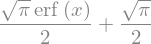

In [365]:
def F(x):
    y= f(t).integrate((t,-sm.oo, x))
    return y
F(x)

In [366]:
F(x).subs(x,sm.oo)

In [367]:
F(x).subs(x,0)

In [368]:
F(x).subs(x,-sm.oo)

In [369]:
sm.plot(F(x),(x,-3,3))

In [370]:
p= sm.plot(
    f(x),
    F(x), 
    (x,-3,3),
    show=False)
p[0].line_color='r'
p[1].line_color='g'
p.legend= True
p.title= f'''
f(x)= ${sm.latex(f(x))}$
F(x)= ${sm.latex(F(x))}$
'''
p.show()

In [371]:
def ϕ(x):
    y= f(x).diff(x)
    return y
ϕ(x)

In [372]:
q= sm.plot(
    ϕ(x),
    (x,-3,3),
    show=False)
q[0].line_color= 'blue'
p.append(q[0])
p.title += f'''
ϕ(x)= ${sm.latex(ϕ(x))}$
'''
p.show()

In [373]:
# 針對 Bell-shape 函數，連續做微分，
# 找尋曲線之最高與最低，亦即尋找其微分函數與x軸之交點

ϕ0= f(x)
ϕ1= f(x).diff(x,1)
ϕ2= f(x).diff(x,2)
ϕ3= f(x).diff(x,3)
ϕ4= f(x).diff(x,4)

q= sm.plot(
    ϕ0,
    ϕ1,
    ϕ2,
    ϕ3,
    ϕ4,
    (x,-3,3),
    show=False)
q[0].line_color= 'red'
q[1].line_color= 'blue'
q[2].line_color= 'cyan'
q[3].line_color= 'magenta'
q[4].line_color= 'gray'

q.legend= True

q.title= f'''
$ϕ_0= f(x)= {sm.latex(ϕ0)}$
$ϕ_1= {sm.latex(ϕ1)}$
$ϕ_2= {sm.latex(ϕ2)}$
$ϕ_3= {sm.latex(ϕ3)}$
$ϕ_4= {sm.latex(ϕ4)}$
'''
q.show()

In [374]:
sm.solve(ϕ1,x)

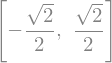

In [375]:
sm.solve(ϕ2,x)

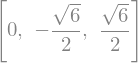

In [376]:
sm.solve(ϕ3,x)

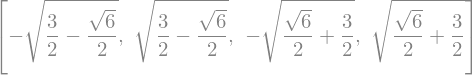

In [377]:
sm.solve(ϕ4,x)

n= 0


--------------------
n= 1


--------------------
n= 2


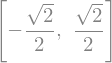

--------------------
n= 3


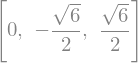

--------------------
n= 4


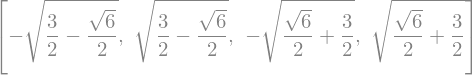

--------------------


In [378]:
# 找出所有曲線與 x-軸的交點。

解集= []
for ϕ in [ϕ0, ϕ1, ϕ2, ϕ3, ϕ4]:
    eq= sm.Eq(ϕ,0)
    解= sm.solve(eq, x)
    解集 += [(eq, 解)]
解集

for n, (eq, sol) in enumerate(解集):
    print(f'n= {n}')
    #print(f'eq= {eq}')
    display(eq)
    #print(f'sol= {sol}')
    display(sol)
    print('-'*20)


In [379]:
# 以上是 1-D Bell-shape Function，
# 接下來我們來看 2D 的 情形

x,y= sm.symbols('x,y')

def f(x,y):
    y= sm.exp(-(x**2 + y**2))
    return y
f(x,y)

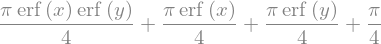

In [380]:
def F(x,y):
    z= f(s,t).integrate(
        (s, -sm.oo, x),
        (t, -sm.oo, y))
    return z
F(x,y)

In [381]:
def ϕ(x,y):
    z= f(x,y).diff(x,y)
    return z
ϕ(x,y)

In [382]:
kwargs={'xlabel': 'x', 'ylabel': 'y'}

sm.plotting.plot3d(f(x,y),(x,-3,3),(y,-3,3), **kwargs)

In [383]:
sm.plotting.plot3d(ϕ(x,y), (x,-3,3),(y,-3,3), **kwargs)

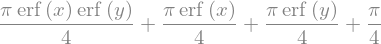

In [384]:
x, y= sm.symbols('x,y')
z= F(x,y)
z

In [386]:
#sm.plotting.plot3d(z, (x,-3,3), (y,-3,3),  **kwargs)
# 這個 有 bug，沒辦法，似乎 sympy.plotting.plot3d 畫不了 erf(x) * erf(y) !!!
# 放棄，轉進 numpy + matplotlib.pyplot 
#

In [387]:
# erf(x)*erf(y) 在 sympy 中畫不出來！
# 轉到 numpy 中試試看
xm,ym= np.meshgrid(
    np.linspace(-3,3,101),
    np.linspace(-3,3,101)
)
zm= sm.lambdify((x,y),z)(xm,ym)

fg= pl.figure()
ax= pl.axes(projection='3d',
            title= f'z= ${sm.latex(z)}$',
            **kwargs)
ax.contour3D(xm, ym, zm, 100,
             cmap= 'rainbow')


In [388]:
# sympy 本來自己有簡單的方式來畫 3d 圖， 但 ...
# F(x,y) 內含 erf(x)*erf(y) ，在 sympy 中畫不出來！
# 於是... 只好轉到 numpy 中試試看 
# (比較麻煩但功能也較多，至少我可以自己配色成彩虹顏色圖。)

def ryPlot3d(z, xrange=(-3,+3), yrange=(-3,+3), kwargs= None):
    
    if kwargs == None:
        kwargs={'xlabel': 'x', 'ylabel': 'y'}
    
    xmin, xmax= xrange
    ymin, ymax= yrange
    
    xm,ym= np.meshgrid(
        np.linspace(xmin,xmax,101),
        np.linspace(ymin,ymax,101)
    )
    zm= sm.lambdify((x,y),z)(xm,ym)

    fg= pl.figure()
    ax= pl.axes(projection='3d',
                title= f'z= ${sm.latex(z)}$',
                **kwargs)
    ax.contour3D(xm, ym, zm, 100,
                 cmap= 'rainbow')
    return fg, ax

z0= f(x,y)
ryPlot3d(z0)

z1= F(x,y)
ryPlot3d(z1)

z2= ϕ(x,y)
ryPlot3d(z2)


(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:title={'center':'z= $4 x y e^{- x^{2} - y^{2}}$'}, xlabel='x', ylabel='y'>)

In [389]:
z= f(x,y)
ryPlot3d(z)

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:title={'center':'z= $e^{- x^{2} - y^{2}}$'}, xlabel='x', ylabel='y'>)

In [390]:
z= f(x,y).diff(x,y)
ryPlot3d(z)

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:title={'center':'z= $4 x y e^{- x^{2} - y^{2}}$'}, xlabel='x', ylabel='y'>)

In [391]:
z= f(x,y).diff(x,y,x,y)
ryPlot3d(z)

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:title={'center':'z= $4 \\left(4 x^{2} y^{2} e^{- x^{2} - y^{2}} - 2 x^{2} e^{- x^{2} - y^{2}} - 2 y^{2} e^{- x^{2} - y^{2}} + e^{- (x^{2} + y^{2})}\\right)$'}, xlabel='x', ylabel='y'>)

In [392]:
z= f(s,t).integrate((s,-sm.oo,x),(t,-sm.oo,y))
ryPlot3d(z)

(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:title={'center':'z= $\\frac{\\pi \\operatorname{erf}{\\left(x \\right)} \\operatorname{erf}{\\left(y \\right)}}{4} + \\frac{\\pi \\operatorname{erf}{\\left(x \\right)}}{4} + \\frac{\\pi \\operatorname{erf}{\\left(y \\right)}}{4} + \\frac{\\pi}{4}$'}, xlabel='x', ylabel='y'>)

In [393]:
# 針對 f(x,y)，
# 分別對 x, y 做微分，
# 欣賞一下。

z0=  f(x,y)
z10= f(x,y).diff(x,1,y,0)
z01= f(x,y).diff(x,0,y,1)
z11= f(x,y).diff(x,1,y,1)

ryPlot3d(z0)
ryPlot3d(z10)
ryPlot3d(z01)
ryPlot3d(z11)


(<Figure size 640x480 with 1 Axes>,
 <Axes3DSubplot:title={'center':'z= $4 x y e^{- x^{2} - y^{2}}$'}, xlabel='x', ylabel='y'>)

In [394]:
# 進入真正的深水區
# 運用 ax.quiver() 結合 Gradient Vector ，
# 把 2D 函數 的梯度圖畫出。

def ryPlot3d(z, xrange=(-3,+3), yrange=(-3,+3), kwargs= None):
    
    if kwargs == None:
        kwargs={'xlabel': 'x', 'ylabel': 'y'}
    
    xmin, xmax= xrange
    ymin, ymax= yrange
    
    xrange= np.linspace(xmin,xmax,101)
    yrange= np.linspace(ymin,ymax,101)
    xm,ym=  np.meshgrid(xrange,yrange)
    
    zm= sm.lambdify((x,y),z)(xm,ym)

    fg= pl.figure()
    ax= pl.axes(projection='3d',
                title= f'z= ${sm.latex(z)}$',
                **kwargs)
    ax.contour3D(xm, ym, zm, 100,
                 cmap= 'rainbow')
    return fg, ax, zm, xrange, yrange


z0=  f(x,y)   #.diff(x,y)
z10= z0.diff(x,1,y,0)
z01= z0.diff(x,0,y,1)


fg, ax, zm, xrange, yrange=  ryPlot3d(z0)

downSampleFactor= 2
xm, ym, zm0= np.meshgrid(
    xrange[::downSampleFactor],
    yrange[::downSampleFactor],
    np.linspace(np.min(zm), np.min(zm)+1, 1)
    )

#dz_dx= 2*x0
#dz_dy= 2*y0

dz_dx_m= sm.lambdify((x,y),z10)(xm,ym)
dz_dy_m= sm.lambdify((x,y),z01)(xm,ym)

u= dz_dx_m
v= dz_dy_m
w= np.zeros_like(xm)
ax.quiver(xm, ym, zm0, 
          u, v, w, 
          length= .1*np.max([u,v]), 
          color = 'gray')

In [395]:
# 進入真正的深水區
# 運用 ax.quiver() 結合 Gradient Vector ，
# 把 2D 函數 的梯度圖畫出。

def ryPlot3d(z, xrange=(-3,+3), yrange=(-3,+3), kwargs= None):
    
    if kwargs == None:
        kwargs={'xlabel': 'x', 'ylabel': 'y'}
    
    xmin, xmax= xrange
    ymin, ymax= yrange
    
    xrange= np.linspace(xmin,xmax,101)
    yrange= np.linspace(ymin,ymax,101)
    xm,ym=  np.meshgrid(xrange,yrange)
    
    zm= sm.lambdify((x,y),z)(xm,ym)

    fg= pl.figure()
    ax= pl.axes(projection='3d',
                title= f'z= ${sm.latex(z)}$',
                **kwargs)
    ax.contour3D(xm, ym, zm, 100,
                 cmap= 'rainbow')
    return fg, ax, zm, xrange, yrange

def ryPlotGradientMap(z,
                      xrange=(-3,+3), 
                      yrange=(-3,+3),
                      downSampleFactor= 4, 
                      lengthFactor= .1):
    
    fg, ax, zm, xrange, yrange=  ryPlot3d(z, 
                                          xrange= xrange, 
                                          yrange=yrange)
    
    z10= z.diff(x,1,y,0)
    z01= z.diff(x,0,y,1)

    #downSampleFactor= 2
    xm, ym, zm0= np.meshgrid(
        xrange[::downSampleFactor],
        yrange[::downSampleFactor],
        np.linspace(np.min(zm), np.min(zm)+1, 1)
        )

    #dz_dx= 2*x0
    #dz_dy= 2*y0

    dz_dx_m= sm.lambdify((x,y),z10)(xm,ym)
    dz_dy_m= sm.lambdify((x,y),z01)(xm,ym)

    u= dz_dx_m
    v= dz_dy_m
    w= np.zeros_like(xm)
    ax.quiver(xm, ym, zm0, 
              u, v, w, 
              length= lengthFactor, #*np.max([u,v]), 
              color = 'gray')


z= f(x,y)
ryPlotGradientMap(z)


In [396]:

# 進入真正的深水區
# 運用 ax.quiver() 結合 Gradient Vector ，
# 把 2D 函數 的梯度圖畫出。

def ryPlot3d(z, xrange=(-3,+3), yrange=(-3,+3), kwargs= None):
    
    if kwargs == None:
        kwargs={'xlabel': 'x', 'ylabel': 'y'}
    
    xmin, xmax= xrange
    ymin, ymax= yrange
    
    xrange= np.linspace(xmin,xmax,101)
    yrange= np.linspace(ymin,ymax,101)
    xm,ym=  np.meshgrid(xrange,yrange)
    
    zm= sm.lambdify((x,y),z)(xm,ym)
    
    fg= pl.figure()
    ax= pl.axes(projection='3d',
                title= f'z= ${sm.latex(z)}$',
                **kwargs)
    ax.contour3D(xm, ym, zm, 100,
                 cmap= 'rainbow')
    return fg, ax, zm, xrange, yrange

def ryPlotGradientMap(z,
                      xrange=(-3,+3), 
                      yrange=(-3,+3),
                      downSampleFactor= 4, 
                      lengthFactor= .1):
    
    fg, ax, zm, xrange, yrange=  ryPlot3d(z, 
                                          xrange= xrange, 
                                          yrange=yrange)
    
    z10= z.diff(x,1,y,0)
    z01= z.diff(x,0,y,1)
    
    #downSampleFactor= 2
    xm, ym, zm0= np.meshgrid(
        xrange[::downSampleFactor],
        yrange[::downSampleFactor],
        np.linspace(np.min(zm), np.min(zm)+1, 1)
        )
    
    #dz_dx= 2*x0
    #dz_dy= 2*y0
    
    dz_dx_m= sm.lambdify((x,y),z10)(xm,ym)
    dz_dy_m= sm.lambdify((x,y),z01)(xm,ym)
    
    u= dz_dx_m
    v= dz_dy_m
    w= np.zeros_like(xm)
    ax.quiver(xm, ym, zm0, 
              u, v, w, 
              length= lengthFactor, #*np.max([u,v]), 
              color = 'gray')

z= f(x,y)
ryPlotGradientMap(z)
z

In [397]:
z= f(x,y).diff(x)
ryPlotGradientMap(z)
z

In [398]:
z

# 與 Wiki 的圖 比較
- https://en.wikipedia.org/wiki/Gradient#/media/File:Gradient_of_a_Function.tif

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Gradient_of_a_Function.tif/lossy-page1-560px-Gradient_of_a_Function.tif.jpg)

In [399]:
z= f(x,y).diff(x)
z= -z/2
ryPlotGradientMap(z)
z